In [1]:
#show current directory
%pwd

'C:\\Users\\tickn\\ml\\EE257'

In [2]:
#take care of imports
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.formula.api as sm

In [3]:
## Read the csv file
dataset = pd.read_csv('mcs_ds_edited_iter_shuffled.csv') 
dataset = dataset.drop("sd_ale",1)

C:\Users\tickn\AppData\Local\Temp/ipykernel_272/894838035.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dataset = dataset.drop("sd_ale",1)


In [4]:
#show first few rows of datafile
dataset.head()

,anchor_ratio,trans_range,node_density,iterations,ale
0,30,15,200,40,0.773546
1,15,15,100,70,0.911941
2,30,15,100,50,0.814867
3,15,20,100,20,1.435332
4,30,15,100,40,1.265909


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anchor_ratio  107 non-null    int64  
 1   trans_range   107 non-null    int64  
 2   node_density  107 non-null    int64  
 3   iterations    107 non-null    int64  
 4   ale           107 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 4.3 KB


In [6]:
# get summary statistics of dataset
dataset.describe()

,anchor_ratio,trans_range,node_density,iterations,ale
count,107.000000,107.000000,107.000000,107.000000,107.000000
mean,20.523364,17.878505,159.813084,47.887850,0.983471
std,6.739556,3.107235,71.189109,24.668874,0.408313
min,10.000000,12.000000,100.000000,14.000000,0.394029
25%,15.000000,15.000000,100.000000,30.000000,0.655368
50%,18.000000,17.000000,100.000000,40.000000,0.899102
75%,30.000000,20.000000,200.000000,70.000000,1.196418
max,30.000000,25.000000,300.000000,100.000000,2.568407


In [7]:
# Use SKLEARN to do the linear regression
X0 = np.c_[np.ones((107, 1)), dataset["anchor_ratio"].values]
y0 = dataset["ale"].values.reshape((107,1))
y0.shape

lin_reg0 = LinearRegression()
lin_reg0.fit(X0,y0)
lin_reg0.intercept_, lin_reg0.coef_

(array([1.07672256]), array([[ 0.        , -0.00454369]]))

### Problem 4 part c

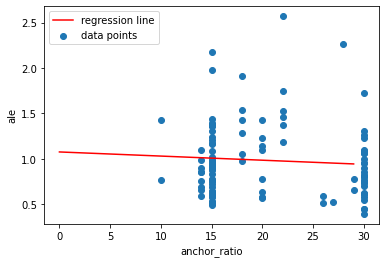

In [8]:
# Simple linear regression ALE vs Anchor Ratio
x0_line = np.arange(0 , np.max(dataset["anchor_ratio"]))
y0_line = lin_reg0.intercept_ + x0_line * lin_reg0.coef_[0,1]

plt.plot(x0_line, y0_line, color ="r", label='regression line')
plt.scatter(dataset["anchor_ratio"].values, dataset["ale"].values, label='data points')
plt.xlabel('anchor_ratio')
plt.ylabel('ale')
plt.legend(loc='upper left')


### Problem 4 part d
##### ALE vs anchor_ratio

In [9]:
# Use statmodel API to get OLS table
results = sm.ols('ale ~ anchor_ratio', dataset).fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                    ale   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.5939
Date:                Tue, 01 Mar 2022   Prob (F-statistic):              0.443
Time:                        22:28:50   Log-Likelihood:                -55.180
No. Observations:                 107   AIC:                             114.4
Df Residuals:                     105   BIC:                             119.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.0767      0.127      8.458   

### Problem 4 part e



*Is there a relationship between predictor and response?* <br/>
*How strong is the relationship* <br/>
*Is the relationship positive or negative?* <br/>

The $\beta$<sub>1</sub> coefficient is negative and close to 0, so there is a very weak and negative relationship between ALE and anchor_ratio


### Problem 4 part f
##### ALE vs trans_range

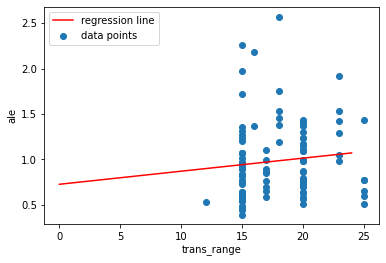

In [10]:
# Simple linear regression ALE vs Transmission Range
X1 = np.c_[np.ones((107, 1)), dataset["trans_range"].values]
y1 = dataset["ale"].values.reshape((107,1))
y1.shape

lin_reg1 = LinearRegression()
lin_reg1.fit(X1,y1)
lin_reg1.intercept_, lin_reg1.coef_ 

x1_line = np.arange(0 , np.max(dataset["trans_range"]))
y1_line = lin_reg1.intercept_ + x1_line * lin_reg1.coef_[0,1]

plt.plot(x1_line, y1_line, color ="r", label='regression line')
plt.scatter(dataset["trans_range"].values, dataset["ale"].values, label='data points')
plt.xlabel('trans_range')
plt.ylabel('ale')
plt.legend(loc='upper left')


In [11]:
# Use statmodel API to get OLS table
results1 = sm.ols('ale ~ trans_range', dataset).fit()
print(results1.summary())


                            OLS Regression Results                            
Dep. Variable:                    ale   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.270
Date:                Tue, 01 Mar 2022   Prob (F-statistic):              0.262
Time:                        22:28:50   Log-Likelihood:                -54.839
No. Observations:                 107   AIC:                             113.7
Df Residuals:                     105   BIC:                             119.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.7267      0.231      3.142      

The $\beta$<sub>1</sub> coefficient is positive and has greater magnitude than the coefficient from linear regression of ALE & anchor_ratio. Therefore, there is a stronger relationship between the ALE and transmission range, as range increases, so does the localization error

##### ALE vs node_density

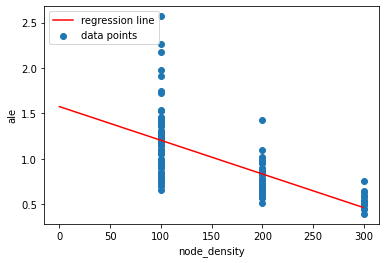

In [12]:
# Simple linear regression ALE vs Transmission Range
X2 = np.c_[np.ones((107, 1)), dataset["node_density"].values]
y2 = dataset["ale"].values.reshape((107,1))
y2.shape

lin_reg2 = LinearRegression()
lin_reg2.fit(X2,y2)
lin_reg2.intercept_, lin_reg1.coef_ 

x2_line = np.arange(0 , np.max(dataset["node_density"]))
y2_line = lin_reg2.intercept_ + x2_line * lin_reg2.coef_[0,1]

plt.plot(x2_line, y2_line, color ="r", label='regression line')
plt.scatter(dataset["node_density"].values, dataset["ale"].values, label='data points')
plt.xlabel('node_density')
plt.ylabel('ale')
plt.legend(loc='upper left')


In [13]:
# Use statmodel API to get OLS table
results2 = sm.ols('ale ~ node_density', dataset).fit()
print(results2.summary())


                            OLS Regression Results                            
Dep. Variable:                    ale   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     75.17
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           5.80e-14
Time:                        22:28:50   Log-Likelihood:                -26.595
No. Observations:                 107   AIC:                             57.19
Df Residuals:                     105   BIC:                             62.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.5755      0.075     21.092   

From the linear regression plot, $\beta$<sub>1</sub> coefficient looks to be strongly and negatively correlated to ALE. The more nodes in an area, the lower the ALE will be. However, the coefficient value in the OLS table does not seem to correspond with the relationship in the linear regression plot. This may be due to high values of node density which are not normalized.

##### ALE vs iterations

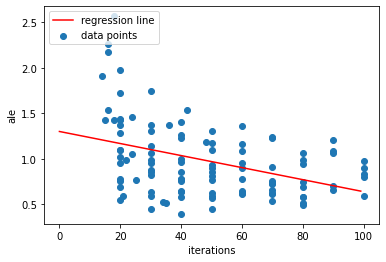

In [14]:
# Simple linear regression ALE vs number of CS iterations
X3 = np.c_[np.ones((107, 1)), dataset["iterations"].values]
y3 = dataset["ale"].values.reshape((107,1))
y3.shape

lin_reg3 = LinearRegression()
lin_reg3.fit(X3,y3)
lin_reg3.intercept_, lin_reg3.coef_ 

x3_line = np.arange(0 , np.max(dataset["iterations"]))
y3_line = lin_reg3.intercept_ + x3_line * lin_reg3.coef_[0,1]

plt.plot(x3_line, y3_line, color ="r", label='regression line')
plt.scatter(dataset["iterations"].values, dataset["ale"].values, label='data points')
plt.xlabel('iterations')
plt.ylabel('ale')
plt.legend(loc='upper left')


In [15]:
# Use statmodel API to get OLS table
results3 = sm.ols('ale ~ iterations', dataset).fit()
print(results3.summary())


                            OLS Regression Results                            
Dep. Variable:                    ale   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     20.05
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           1.93e-05
Time:                        22:28:51   Log-Likelihood:                -46.134
No. Observations:                 107   AIC:                             96.27
Df Residuals:                     105   BIC:                             101.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3008      0.080     16.331      0.0

Again, from the linear regression plot, $\beta$<sub>1</sub> coefficient looks to be strongly and negatively correlated to ALE. However, it does not appear iteration is as strongly related than node density. Also, the coefficient value in the OLS table does not seem to proportional with the relationship in the linear regression plot. This may be due to higher values of iteration which are not normalized.

##### Problem 4 part g

In [16]:
results_multi = sm.ols('ale ~ anchor_ratio + trans_range + node_density + iterations', dataset).fit()
print(results_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                    ale   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     51.69
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           1.03e-23
Time:                        22:28:51   Log-Likelihood:                 3.7749
No. Observations:                 107   AIC:                             2.450
Df Residuals:                     102   BIC:                             15.81
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.7008      0.207     13.018   

It seems with multi linear regression using all 4 inputs, anchor_ratio and trans_range have the most significant relationship to the ALE response. As we increase the number of anchor sensors and transmission range, ALE should go down. This is contrary to the simple linear regression of ALE and transmission range which suggest an increase in transmission raneg would increase the predicted ALE.

##### Problem 4 part h

In [17]:
# Polynomial transform
dataset_nonlinear = dataset
dataset_nonlinear["trans_range"] = pow(dataset["trans_range"],1/2)
dataset_nonlinear["node_density"] = pow(dataset["node_density"],1/3)
dataset_nonlinear["iterations"] = pow(dataset["iterations"],1/4)

results_poly = sm.ols('ale ~ anchor_ratio + trans_range + node_density + iterations', dataset_nonlinear).fit()
print(results_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                    ale   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     64.51
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           4.36e-27
Time:                        22:28:51   Log-Likelihood:                 11.993
No. Observations:                 107   AIC:                            -13.99
Df Residuals:                     102   BIC:                           -0.6228
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.8236      0.430     13.530   

Comparing regression results of my nonlinear features and the coefficients from multi linear regression, the coefficients and suggested relationship between features and the response are significantly different. In the simple linear regression between ALE and node_density / iterations, I observed the value of the OLS table coefficients did not seem proportional to the relationship suggested by the linear regression plot. Possible explanations for this were the magnitude of input values were too large and not normalized. By taking the cubed and quadratic root of node_density and iterations respectively, the new coefficient values of the nonlinear features increases significantly.

##### Problem 4 part i

In [18]:
corr_matrix = dataset.corr()
print(corr_matrix)

              anchor_ratio  trans_range  node_density  iterations       ale
anchor_ratio      1.000000    -0.101142     -0.141554    0.037617 -0.074997
trans_range      -0.101142     1.000000     -0.250559   -0.217159  0.116640
node_density     -0.141554    -0.250559      1.000000   -0.027120 -0.655844
iterations        0.037617    -0.217159     -0.027120    1.000000 -0.459518
ale              -0.074997     0.116640     -0.655844   -0.459518  1.000000
